## **SKENARIO 1: Klasifikasi KNN - Feature Selection**

## **IMPORT LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, classification_report, confusion_matrix, accuracy_score
import time
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.decomposition import PCA

import heapq
from scipy.spatial import Delaunay
from collections import defaultdict, Counter

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

## **DATA LOADING**

In [2]:
# Load dan read data
url_train = "https://drive.google.com/uc?export=download&id=1mwBc1Xbdp5vezgcQLi-BWcsaVNxiqblv"
url_test = "https://drive.google.com/uc?export=download&id=1nSQr83pGwZQ-ShLgrDWH0AoPEi3E5FgF"
url_label = "https://drive.google.com/uc?export=download&id=169-NXQYAKyntsfhcEjzWc0oNB4dD4DkQ"

df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)
df_label = pd.read_csv(url_label)

In [3]:
# Menggabungkan fitur train dan label 
print(f"Data Train Loaded\nDimension: {df_train.shape}")

Data Train Loaded
Dimension: (3817, 16)


## **FEATURE ENGINEERING**

### - **Split Data**

In [4]:
# Melakukan Split data
X_train_raw, X_val_raw, y_train, y_val = train_test_split(df_train, df_label, test_size=0.2, random_state=42, stratify=df_label)

print(f"Data Split Done. \nTrain Shape: {X_train_raw.shape}, Val Shape: {X_val_raw.shape}")

Data Split Done. 
Train Shape: (3053, 16), Val Shape: (764, 16)


In [5]:
# Mempersiapkan Data Testing
X_test_raw = df_test.drop(columns=['ID'])
print(f"Data Test Loaded\nDimension: {X_test_raw.shape}")

Data Test Loaded
Dimension: (3818, 16)


In [6]:
X_train_raw.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
2329,1962,Doktor,Cerai,170435626.0,0.0,0.0,29.0,62713.0,925837.0,117753.0,151245.0,1.0,4.0,12.0,0.0,NaN
394,1973,Doktor,Rencana Menikah,171014909.0,0.0,0.0,79.0,189937.0,1166661.0,164325.0,84866.0,0.0,5.0,6.0,0.0,NaN
981,1951,Sarjana,Rencana Menikah,98962000.0,0.0,1.0,36.0,26299.0,159817.0,12138.0,24276.0,5.0,6.0,6.0,1.0,2013-01-14
1199,1966,Sarjana,Sendiri,93386407.0,0.0,1.0,38.0,10163.0,48697.0,10870.0,2632.0,4.0,NaN,4.0,0.0,NaN
3137,1959,Sarjana,Menikah,150100639.0,0.0,NaN,46.0,127193.0,307425.0,90571.0,44549.0,NaN,7.0,8.0,0.0,NaN


In [7]:
X_val_raw.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
2464,1957,Sarjana,Sendiri,33742926.0,0.0,0.0,79.0,8109.0,25610.0,8792.0,5398.0,3.0,NaN,NaN,0.0,NaN
480,1976,Sarjana,Rencana Menikah,140988476.0,0.0,NaN,45.0,102826.0,804331.0,52446.0,44966.0,0.0,6.0,5.0,0.0,NaN
2368,1979,Sarjana,NaN,29604689.0,1.0,0.0,57.0,0.0,6331.0,16100.0,12090.0,1.0,0.0,0.0,0.0,NaN
3457,1977,Sarjana,Rencana Menikah,118810462.0,0.0,1.0,60.0,30193.0,172971.0,85239.0,72449.0,2.0,8.0,6.0,0.0,NaN
503,1972,Sarjana,Sendiri,129913133.0,0.0,0.0,49.0,30597.0,551015.0,29839.0,49816.0,4.0,2.0,8.0,0.0,NaN


In [8]:
X_test_raw.head()

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,1957,Sarjana,NaN,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,NaN
1,1968,Doktor,Menikah,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,NaN
2,1968,SMA,Menikah,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,2013-08-06
3,1971,Doktor,Menikah,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,NaN
4,1974,Sarjana,Rencana Menikah,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,NaN


### - **Missing Value Handling**

In [9]:
# Ganti noise '5' dengan NaN agar dianggap missing value
X_train_clean = X_train_raw.copy()
X_val_clean = X_val_raw.copy()
X_test_clean = X_test_raw.copy()

cols_with_noise = ['pendidikan', 'status_pernikahan']
for col in cols_with_noise:
    X_train_clean[col] = X_train_clean[col].replace('5', np.nan)
    X_val_clean[col] = X_val_clean[col].replace('5', np.nan)
    X_test_clean[col] = X_test_clean[col].replace('5', np.nan)

In [10]:
num_cols = X_train_clean.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X_train_clean.select_dtypes(include=['object']).columns

In [11]:
# Imputasi Missing Values


# Numeric (Median)
imputer_num = SimpleImputer(strategy='median')
X_train_clean[num_cols] = imputer_num.fit_transform(X_train_clean[num_cols])
X_val_clean[num_cols] = imputer_num.transform(X_val_clean[num_cols])
X_test_clean[num_cols] = imputer_num.transform(X_test_clean[num_cols])

# Categorical (Mode)
imputer_cat = SimpleImputer(strategy='most_frequent')
X_train_clean[cat_cols] = imputer_cat.fit_transform(X_train_clean[cat_cols])
X_val_clean[cat_cols] = imputer_cat.transform(X_val_clean[cat_cols])
X_test_clean[cat_cols] = imputer_cat.transform(X_test_clean[cat_cols])


X_train_imp = pd.DataFrame(X_train_clean, columns=X_train_clean.columns, index=X_train_raw.index)
X_val_imp = pd.DataFrame(X_val_clean, columns=X_val_clean.columns, index=X_val_raw.index)
X_test_imp = pd.DataFrame(X_test_clean, columns=X_test_clean.columns, index=X_test_raw.index)

print("Missing Value Imputation Selesai")

Missing Value Imputation Selesai


In [12]:
X_train_imp.isna().sum()

tahun_kelahiran            0
pendidikan                 0
status_pernikahan          0
pendapatan                 0
jumlah_anak_balita         0
jumlah_anak_remaja         0
terakhir_belanja           0
belanja_buah               0
belanja_daging             0
belanja_ikan               0
belanja_kue                0
pembelian_diskon           0
pembelian_web              0
pembelian_toko             0
keluhan                    0
tanggal_menjadi_anggota    0
dtype: int64

In [13]:
X_val_imp.isna().sum()

tahun_kelahiran            0
pendidikan                 0
status_pernikahan          0
pendapatan                 0
jumlah_anak_balita         0
jumlah_anak_remaja         0
terakhir_belanja           0
belanja_buah               0
belanja_daging             0
belanja_ikan               0
belanja_kue                0
pembelian_diskon           0
pembelian_web              0
pembelian_toko             0
keluhan                    0
tanggal_menjadi_anggota    0
dtype: int64

In [14]:
X_test_imp.isna().sum()

tahun_kelahiran            0
pendidikan                 0
status_pernikahan          0
pendapatan                 0
jumlah_anak_balita         0
jumlah_anak_remaja         0
terakhir_belanja           0
belanja_buah               0
belanja_daging             0
belanja_ikan               0
belanja_kue                0
pembelian_diskon           0
pembelian_web              0
pembelian_toko             0
keluhan                    0
tanggal_menjadi_anggota    0
dtype: int64

### - **Feature Creation**

In [15]:
X_train_fc = X_train_imp.copy()
X_val_fc = X_val_imp.copy()
X_test_fc = X_test_imp.copy()

def feature_creation(df_in):
    df_out = df_in.copy()
    
    # 1. Fix Date Type
    df_out['tanggal_menjadi_anggota'] = pd.to_datetime(df_out['tanggal_menjadi_anggota'], errors='coerce')
    
    # 2. Feature: Umur
    df_out['umur'] = 2024 - df_out['tahun_kelahiran']

    # 3. Feature: Lama Bergabung
    df_out['lama_bergabung_hari'] = (pd.Timestamp('2024-01-01') - df_out['tanggal_menjadi_anggota']).dt.days
    df_out['lama_bergabung_hari'] = df_out['lama_bergabung_hari'].fillna(0)
    
    # 3. Feature: is_member
    df_out['is_member'] = df_out['tanggal_menjadi_anggota'].notna().astype(int)
    
    # 4. Feature: Total Belanja
    col_belanja = ['belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue']
    df_out[col_belanja] = df_out[col_belanja].fillna(0)
    df_out['total_belanja'] = df_out[col_belanja].sum(axis=1)

    # Drop kolom mentah
    df_out.drop(columns=['tahun_kelahiran', 'tanggal_menjadi_anggota'], inplace=True, errors='ignore')
    
    return df_out

X_train_fc = feature_creation(X_train_fc)
X_val_fc = feature_creation(X_val_fc)
X_test_fc = feature_creation(X_test_fc)

print(f"Feature Creation Selesai\nTrain Dimension: {X_train_fc.shape}")
print(f"Feature Creation Selesai\nValidation Dimension: {X_val_fc.shape}")
print(f"Feature Creation Selesai\nDimension: {X_test_fc.shape}")

Feature Creation Selesai
Train Dimension: (3053, 18)
Feature Creation Selesai
Validation Dimension: (764, 18)
Feature Creation Selesai
Dimension: (3818, 18)


In [16]:
X_train_fc.head()

,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,umur,lama_bergabung_hari,is_member,total_belanja
2329,Doktor,Cerai,170435626.0,0.0,0.0,29.0,62713.0,925837.0,117753.0,151245.0,1.0,4.0,12.0,0.0,62.0,4069,1,1257548.0
394,Doktor,Rencana Menikah,171014909.0,0.0,0.0,79.0,189937.0,1166661.0,164325.0,84866.0,0.0,5.0,6.0,0.0,51.0,4069,1,1605789.0
981,Sarjana,Rencana Menikah,98962000.0,0.0,1.0,36.0,26299.0,159817.0,12138.0,24276.0,5.0,6.0,6.0,1.0,73.0,4004,1,222530.0
1199,Sarjana,Sendiri,93386407.0,0.0,1.0,38.0,10163.0,48697.0,10870.0,2632.0,4.0,4.0,4.0,0.0,58.0,4069,1,72362.0
3137,Sarjana,Menikah,150100639.0,0.0,0.0,46.0,127193.0,307425.0,90571.0,44549.0,2.0,7.0,8.0,0.0,65.0,4069,1,569738.0


### - **FEATURE SELECTION**

In [17]:
# from sklearn.feature_selection import SequentialFeatureSelector
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import f1_score
# import pandas as pd

# # Model dasar
# knn = KNeighborsClassifier(
#     n_neighbors=1,
#     weights="uniform",
#     metric="manhattan"
# )

# # Sequential Feature Selector
# sfs = SequentialFeatureSelector(
#     estimator=knn,
#     n_features_to_select=18,     # jumlah fitur akhir
#     direction="forward",         # forward selection
#     scoring="f1_macro",          # sesuai task classification
#     cv=3,                        # cross-validation di TRAIN
#     n_jobs=-1
# )

# # FIT HANYA di data TRAIN
# sfs.fit(X_train_fc, y_train)

# # Boolean mask fitur terpilih
# selected_mask = sfs.get_support()

# # Nama fitur
# selected_features = X_train_fc.columns[selected_mask].tolist()

# print("Selected Features (Wrapper SFS):")
# print(selected_features)

# # Dataset final
# X_train_fs = X_train_fc[selected_features]
# X_val_fs = X_val_fc[selected_features]
# X_test_fs = X_test_fc[selected_features]

# print("Feature Selection Done\nTrain shape:", X_train_fs.shape)
# print("Feature Selection Done\nValidation shape:", X_val_fs.shape)
# print("Feature Selection Done\nTest shape:", X_test_fs.shape)

In [18]:
X_train_fs = X_train_fc.copy()
X_val_fs = X_val_fc.copy()
X_test_fs = X_test_fc.copy()

def feature_selection(df_in):
    selected_features = [
        "umur",
        "status_pernikahan",
        "is_member",
        "lama_bergabung_hari",
        "terakhir_belanja",
        "total_belanja",
        "pembelian_diskon",
        "pembelian_web",
        "pembelian_toko",
        "keluhan",
        "jumlah_anak_balita",
        "jumlah_anak_remaja"
    ]
    df_out = df_in[selected_features]
    return df_out

X_train_fs = feature_selection(X_train_fs)
X_val_fs = feature_selection(X_val_fs)
X_test_fs = feature_selection(X_test_fs)

print(f"Feature Selection Selesai\nTrain Dimension: {X_train_fs.shape}")
print(f"Feature Selection Selesai\nValidation Dimension: {X_val_fs.shape}")
print(f"Feature Selection Selesai\nTest Dimension: {X_test_fs.shape}")

Feature Selection Selesai
Train Dimension: (3053, 12)
Feature Selection Selesai
Validation Dimension: (764, 12)
Feature Selection Selesai
Test Dimension: (3818, 12)


In [19]:
X_train_fs.head()

,umur,status_pernikahan,is_member,lama_bergabung_hari,terakhir_belanja,total_belanja,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,jumlah_anak_balita,jumlah_anak_remaja
2329,62.0,Cerai,1,4069,29.0,1257548.0,1.0,4.0,12.0,0.0,0.0,0.0
394,51.0,Rencana Menikah,1,4069,79.0,1605789.0,0.0,5.0,6.0,0.0,0.0,0.0
981,73.0,Rencana Menikah,1,4004,36.0,222530.0,5.0,6.0,6.0,1.0,0.0,1.0
1199,58.0,Sendiri,1,4069,38.0,72362.0,4.0,4.0,4.0,0.0,0.0,1.0
3137,65.0,Menikah,1,4069,46.0,569738.0,2.0,7.0,8.0,0.0,0.0,0.0


### - **FEATURE TRANSFORMATION**

#### Outlier Handling

In [20]:
# Handling Outliers 
X_train_oh = X_train_fs.copy()
X_val_oh = X_val_fs.copy()
X_test_oh = X_test_fs.copy()

def get_iqr_bounds(series, factor):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR

    return lower_bound, upper_bound


outlier_summary = []

num_cols = X_train_oh.select_dtypes(include="number").columns.tolist()

for col in num_cols:
    mild_l, mild_u = get_iqr_bounds(X_train_oh[col], 1.5)
    ext_l, ext_u = get_iqr_bounds(X_train_oh[col], 3)
    vext_l, vext_u = get_iqr_bounds(X_train_oh[col], 5)

    outlier_summary.append({
        "feature": col,
        "mild_outlier_pct (%)":
            ((X_train_oh[col] < mild_l) | (X_train_oh[col] > mild_u)).mean() * 100,
        "extreme_outlier_pct (%)":
            ((X_train_oh[col] < ext_l) | (X_train_oh[col] > ext_u)).mean() * 100,
        "very_extreme_outlier_pct (%)":
            ((X_train_oh[col] < vext_l) | (X_train_oh[col] > vext_u)).mean() * 100
    })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df

,feature,mild_outlier_pct (%),extreme_outlier_pct (%),very_extreme_outlier_pct (%)
0,umur,0.491320,0.131019,0.000000
1,is_member,0.000000,0.000000,0.000000
2,lama_bergabung_hari,27.906977,27.906977,27.906977
3,terakhir_belanja,0.000000,0.000000,0.000000
4,total_belanja,1.277432,0.000000,0.000000
5,pembelian_diskon,3.832296,0.425811,0.131019
6,pembelian_web,0.556829,0.065509,0.065509
7,pembelian_toko,0.294792,0.000000,0.000000
8,keluhan,0.556829,0.556829,0.556829
9,jumlah_anak_balita,0.000000,0.000000,0.000000


In [21]:
cols_to_winsor = outlier_df.loc[
    (outlier_df["extreme_outlier_pct (%)"] > 0) |
    (outlier_df["very_extreme_outlier_pct (%)"] > 0),
    "feature"
].tolist()


winsor_limits = {}

for col in cols_to_winsor:
    lower, upper = get_iqr_bounds(X_train_oh[col], factor=1.5)
    winsor_limits[col] = (lower, upper)

for col, (lower, upper) in winsor_limits.items():
    X_train_oh[col] = X_train_oh[col].clip(lower, upper)
    X_val_oh[col] = X_val_oh[col].clip(lower, upper)
    X_test_oh[col] = X_test_oh[col].clip(lower, upper)

print("Handling outliers selesai")

Handling outliers selesai


#### Encoding

In [22]:
# Melakukan encoding
X_train_enc = X_train_oh.copy()
X_val_enc = X_val_oh.copy()
X_test_enc = X_test_oh.copy()

# Nominal Fitur -> One-Hot Encoding (Status Pernikahan)
X_train_enc = pd.get_dummies(X_train_enc, columns=['status_pernikahan'], prefix='status', dtype=int)
X_val_enc = pd.get_dummies(X_val_enc, columns=['status_pernikahan'], prefix='status', dtype=int)
X_test_enc = pd.get_dummies(X_test_enc, columns=['status_pernikahan'], prefix='status', dtype=int)
X_val_enc = X_val_enc.reindex(columns=X_train_enc.columns, fill_value=0)
X_test_enc = X_test_enc.reindex(columns=X_train_enc.columns, fill_value=0)

print("Encoding selesai")

Encoding selesai


In [23]:
X_train_enc.head()

,umur,is_member,lama_bergabung_hari,terakhir_belanja,total_belanja,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,jumlah_anak_balita,jumlah_anak_remaja,status_Cerai,status_Cerai Mati,status_Menikah,status_Rencana Menikah,status_Sendiri
2329,62.0,1,4069,29.0,1257548.0,1.0,4.0,12.0,0.0,0.0,0.0,1,0,0,0,0
394,51.0,1,4069,79.0,1605789.0,0.0,5.0,6.0,0.0,0.0,0.0,0,0,0,1,0
981,73.0,1,4069,36.0,222530.0,5.0,6.0,6.0,0.0,0.0,1.0,0,0,0,1,0
1199,58.0,1,4069,38.0,72362.0,4.0,4.0,4.0,0.0,0.0,1.0,0,0,0,0,1
3137,65.0,1,4069,46.0,569738.0,2.0,7.0,8.0,0.0,0.0,0.0,0,0,1,0,0


#### Scaling

In [24]:
# Melakukan Scaling
scaler = RobustScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train_enc),
    columns=X_train_enc.columns,
    index=X_train_enc.index
)

X_val_scaled = pd.DataFrame(
    scaler.transform(X_val_enc),
    columns=X_val_enc.columns,
    index=X_val_enc.index
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_enc),
    columns=X_test_enc.columns,
    index=X_test_enc.index
)

print("Scaling selesai")

Scaling selesai


In [25]:
X_train_scaled.head()

,umur,is_member,lama_bergabung_hari,terakhir_belanja,total_belanja,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,jumlah_anak_balita,jumlah_anak_remaja,status_Cerai,status_Cerai Mati,status_Menikah,status_Rencana Menikah,status_Sendiri
2329,0.352941,0.0,0.0,-0.428571,0.986201,-0.5,0.00,1.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
394,-0.294118,0.0,0.0,0.761905,1.366308,-1.0,0.25,0.25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
981,1.000000,0.0,0.0,-0.261905,-0.143528,1.5,0.50,0.25,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1199,0.117647,0.0,0.0,-0.214286,-0.307437,1.0,0.00,-0.25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3137,0.529412,0.0,0.0,-0.023810,0.235452,0.0,0.75,0.75,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [26]:
X_val_scaled.head()

,umur,is_member,lama_bergabung_hari,terakhir_belanja,total_belanja,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,jumlah_anak_balita,jumlah_anak_remaja,status_Cerai,status_Cerai Mati,status_Menikah,status_Rencana Menikah,status_Sendiri
2464,0.647059,0.0,0.0,0.761905,-0.334128,0.5,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
480,-0.470588,0.0,0.0,-0.047619,0.710073,-1.0,0.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2368,-0.647059,0.0,0.0,0.238095,-0.348741,-0.5,-1.0,-1.25,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3457,-0.529412,0.0,0.0,0.309524,0.007452,0.0,1.0,0.25,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
503,-0.235294,0.0,0.0,0.047619,0.335357,1.0,-0.5,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
X_test_scaled.head()

,umur,is_member,lama_bergabung_hari,terakhir_belanja,total_belanja,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,jumlah_anak_balita,jumlah_anak_remaja,status_Cerai,status_Cerai Mati,status_Menikah,status_Rencana Menikah,status_Sendiri
0,0.647059,0.0,0.0,0.380952,0.663797,1.0,0.50,1.25,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.0,0.0,0.261905,0.152318,0.0,0.25,1.25,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.000000,0.0,0.0,-0.309524,-0.291472,0.0,-1.00,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.176471,0.0,0.0,0.833333,-0.232870,0.5,0.25,0.50,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.352941,0.0,0.0,-0.452381,1.909718,-1.0,-0.75,0.75,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### - **FEATURE EXTRACTION**

In [28]:
pca = PCA(n_components=6, whiten=False, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [29]:
# plt.figure(figsize=(12, 10))

# sc = plt.scatter(
#     X_train_pca[:, 0],
#     X_train_pca[:, 1],
#     c=y_train.squeeze(),
#     cmap='tab10',
#     alpha=0.7
# )

# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.title('2D PCA Visualization')

# plt.colorbar(sc, label='Jumlah Promosi')
# plt.show()

In [30]:
pca_cols = [f"PCA_{i+1}" for i in range(X_train_pca.shape[1])]

X_train_final = pd.DataFrame(
    X_train_pca,
    columns=pca_cols,
    index=X_train_scaled.index
)   

X_val_final = pd.DataFrame(
    X_val_pca,
    columns=pca_cols,
    index=X_val_scaled.index
)

X_test_final = pd.DataFrame(
    X_test_pca,
    columns=pca_cols,
    index=X_test_scaled.index
)

# Menampilkan explained variance ratio
explained_var = pca.explained_variance_ratio_
cum_explained_var = explained_var.cumsum()

for i, (var, cum_var) in enumerate(zip(explained_var, cum_explained_var), start=1):
    print(f"PC{i}: {var:.4f} | Cumulative: {cum_var:.4f}")

PC1: 0.2390 | Cumulative: 0.2390
PC2: 0.1973 | Cumulative: 0.4363
PC3: 0.1057 | Cumulative: 0.5420
PC4: 0.0888 | Cumulative: 0.6308
PC5: 0.0839 | Cumulative: 0.7147
PC6: 0.0772 | Cumulative: 0.7919


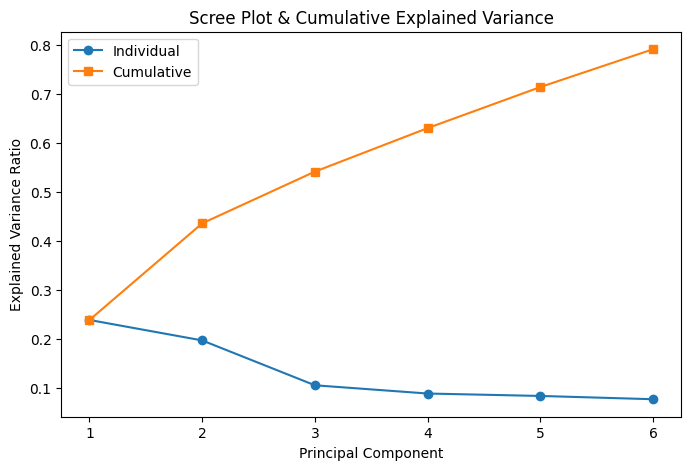

In [31]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o')
plt.plot(range(1, len(cum_explained_var) + 1), cum_explained_var, marker='s')

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot & Cumulative Explained Variance')
plt.legend(['Individual', 'Cumulative'])
plt.show()

In [32]:
X_train_final.head(7)

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6
2329,1.592734,0.193880,-0.265834,0.043208,-0.774810,-0.454755
394,1.294082,-0.620183,0.187011,0.460090,0.431597,0.903303
981,-0.810793,1.700656,0.482487,-0.301744,-0.711406,0.437708
1199,-1.134581,0.565418,-0.153661,-0.195495,-0.176196,-0.257848
3137,0.544572,0.621616,0.264044,-0.181519,0.300772,-0.742629
635,-1.155236,0.825359,0.512458,0.566908,0.302712,0.859438
1646,0.121038,-0.526258,0.412440,0.281481,-0.238426,-0.849288


In [33]:
X_val_final.head(7)

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6
2464,-0.551956,0.349403,0.406062,0.556555,0.224590,-0.173319
480,0.816349,-0.754260,0.126760,-0.406823,0.387607,0.806276
2368,-1.308618,-1.724936,0.144792,0.312695,0.026166,0.840469
3457,0.027414,0.472649,0.043703,-0.185758,0.652424,0.828494
503,-0.188673,0.394163,-1.017247,0.474484,-0.486177,-0.210808
2127,-0.612256,1.199083,0.251233,0.847994,0.415081,0.859449
986,-1.034503,-1.271465,-0.463347,-0.379039,-0.645536,0.667668


In [34]:
X_test_final.head(7)

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6
0,0.423001,1.689101,0.076979,0.463218,-0.544482,0.507462
1,0.466110,0.645864,-0.111593,0.496458,0.074524,-0.818476
2,-0.594963,-0.676781,-0.068097,0.264840,-0.534751,-0.836597
3,-0.399676,0.713422,-0.029975,0.797856,0.584030,-0.560565
4,1.617444,-1.031745,-0.467611,0.117142,-0.983416,0.535786
5,1.298034,0.295879,0.040451,-0.574480,0.632672,-0.802890
6,2.428397,0.112474,0.000137,-0.731816,0.756980,0.017224


In [35]:
y_val.head(7)

,jumlah_promosi
2464,2
480,2
2368,3
3457,3
503,5
2127,4
986,2


## **MODELING**


Mencari nilai K terbaik (Accuracy & Macro F1)...
K= 1 | Accuracy=53.40% | Macro F1=52.49%
K= 2 | Accuracy=53.40% | Macro F1=52.49%
K= 3 | Accuracy=54.58% | Macro F1=53.01%
K= 4 | Accuracy=52.62% | Macro F1=50.62%
K= 5 | Accuracy=52.23% | Macro F1=50.32%
K= 6 | Accuracy=50.65% | Macro F1=48.34%
K= 7 | Accuracy=51.05% | Macro F1=48.67%
K= 8 | Accuracy=51.31% | Macro F1=48.99%
K= 9 | Accuracy=50.52% | Macro F1=47.75%
K=10 | Accuracy=49.87% | Macro F1=46.82%
K=11 | Accuracy=50.00% | Macro F1=46.51%
K=12 | Accuracy=50.65% | Macro F1=47.40%
K=13 | Accuracy=50.26% | Macro F1=47.09%
K=14 | Accuracy=50.26% | Macro F1=46.56%
K=15 | Accuracy=50.00% | Macro F1=45.64%
K=16 | Accuracy=49.74% | Macro F1=45.24%
K=17 | Accuracy=49.61% | Macro F1=45.47%
K=18 | Accuracy=49.08% | Macro F1=44.71%
K=19 | Accuracy=49.35% | Macro F1=45.10%
K=20 | Accuracy=49.21% | Macro F1=44.53%

===== BEST PARAMETER (BERDASARKAN MACRO F1) =====
Best K        : 3
Metric        : euclidean
Weights       : distance
Macro F1  

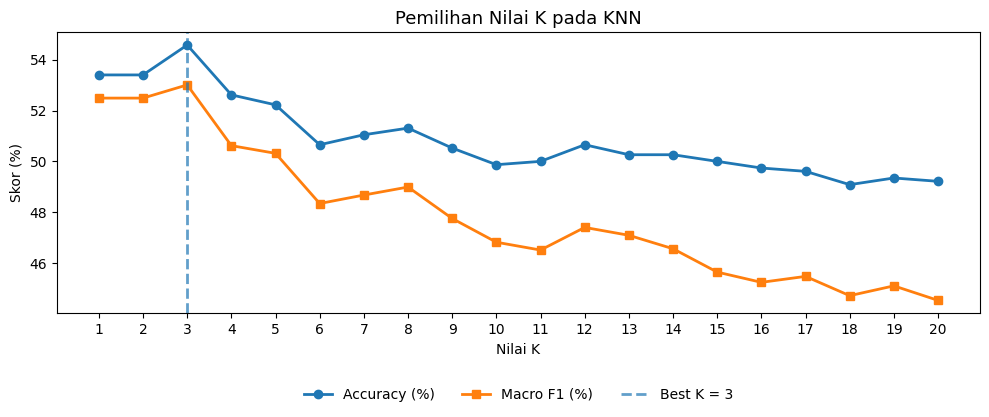

In [36]:
# Mencari Best K (Accuracy & Macro F1)
best_f1 = 0
best_k = 1
best_metric = None
best_weights = None

accuracies = []
f1_macros = []

print("\nMencari nilai K terbaik (Accuracy & Macro F1)...")

for k in range(1, 21):
    knn = KNeighborsClassifier(
        n_neighbors=k,
        weights='distance',
        metric='euclidean'
    )
    knn.fit(X_train_final, y_train)

    y_pred = knn.predict(X_val_final)

    acc = accuracy_score(y_val, y_pred)
    f1_macro = f1_score(y_val, y_pred, average='macro')

    accuracies.append(acc * 100)
    f1_macros.append(f1_macro * 100)

    print(f"K={k:2d} | Accuracy={acc*100:.2f}% | Macro F1={f1_macro*100:.2f}%")

    # Best berdasarkan Macro F1
    if f1_macro > best_f1:
        best_f1 = f1_macro
        best_k = k
        best_metric = knn.metric
        best_weights = knn.weights

print("\n===== BEST PARAMETER (BERDASARKAN MACRO F1) =====")
print(f"Best K        : {best_k}")
print(f"Metric        : {best_metric}")
print(f"Weights       : {best_weights}")
print(f"Macro F1      : {best_f1*100:.2f}%")

#===============================
# Visualisasi Accuracy & Macro F1
# ===============================
plt.figure(figsize=(10, 5))

ks = range(1, 21)

plt.plot(
    ks,
    accuracies,
    marker='o',
    linewidth=2,
    label='Accuracy (%)'
)

plt.plot(
    ks,
    f1_macros,
    marker='s',
    linewidth=2,
    label='Macro F1 (%)'
)

# ===============================
# TANDA K OPTIMAL
# ===============================
optimal_k = best_k  # = 19

# Garis vertikal
plt.axvline(
    x=optimal_k,
    linestyle='--',
    linewidth=2,
    alpha=0.7,
    label=f'Best K = {optimal_k}'
)

# ===============================
# Properti Plot
# ===============================
plt.title('Pemilihan Nilai K pada KNN', fontsize=13)
plt.xlabel('Nilai K')
plt.ylabel('Skor (%)')
plt.xticks(ks)

# Legend di bawah (konsisten VBNN)
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.22),
    ncol=3,
    frameon=False
)

plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.show()

In [38]:
# Training
start_train = time.time()

knn_final = KNeighborsClassifier(
    n_neighbors=best_k,
    weights=best_weights,
    metric=best_metric
)
knn_final.fit(X_train_final, y_train)

train_time = time.time() - start_train
y_train_pred = knn_final.predict(X_train_final)

train_acc = accuracy_score(y_train, y_train_pred)
train_f1_macro = f1_score(y_train, y_train_pred, average='macro')

print("===== TRAINING PERFORMANCE =====")
print(f"Training Time: {train_time:.2f} detik")
print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Training Macro F1: {train_f1_macro * 100:.2f}%")

===== TRAINING PERFORMANCE =====
Training Time: 0.01 detik
Training Accuracy: 100.00%
Training Macro F1: 100.00%


## **EVALUATION**

In [39]:
start_pred = time.time()
y_pred_vbnn = knn_final.predict(X_val_final.values)
time_pred = time.time() - start_pred

f1_macro = f1_score(y_val.values, y_pred_vbnn, average="macro")
accuracy = accuracy_score(y_val.values, y_pred_vbnn)

print(f"Accuracy       : {accuracy * 100:.2f}%")
print(f"Macro F1 Score : {f1_macro * 100:.2f}%")
print(f"Waktu Prediksi : {time_pred:.4f} detik\n")

print("Classification Report:")
print(classification_report(y_val.values, y_pred_vbnn))

Accuracy       : 54.58%
Macro F1 Score : 53.01%
Waktu Prediksi : 0.0083 detik

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.48      0.52       197
           1       0.37      0.24      0.29       103
           2       0.33      0.37      0.35        78
           3       0.62      0.72      0.67        94
           4       0.65      0.70      0.68       103
           5       0.60      0.79      0.68       112
           6       0.53      0.51      0.52        77

    accuracy                           0.55       764
   macro avg       0.53      0.55      0.53       764
weighted avg       0.54      0.55      0.54       764



In [42]:
start_pred = time.time()
y_pred = knn_final.predict(X_val_final)
pred_time = time.time() - start_pred


val_acc = accuracy_score(y_val, y_pred)
val_f1_macro = f1_score(y_val, y_pred, average='macro')

print("===== EVALUATION PERFORMANCE (VALIDATION SET) =====")
print(f"Accuracy        : {val_acc * 100:.2f}%")
print(f"Macro F1 Score  : {val_f1_macro * 100:.2f}%")
print(f"Waktu Prediksi  : {pred_time:.6f} detik")

===== EVALUATION PERFORMANCE (VALIDATION SET) =====
Accuracy        : 54.58%
Macro F1 Score  : 53.01%
Waktu Prediksi  : 0.010543 detik



Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.48      0.52       197
           1       0.37      0.24      0.29       103
           2       0.33      0.37      0.35        78
           3       0.62      0.72      0.67        94
           4       0.65      0.70      0.68       103
           5       0.60      0.79      0.68       112
           6       0.53      0.51      0.52        77

    accuracy                           0.55       764
   macro avg       0.53      0.55      0.53       764
weighted avg       0.54      0.55      0.54       764



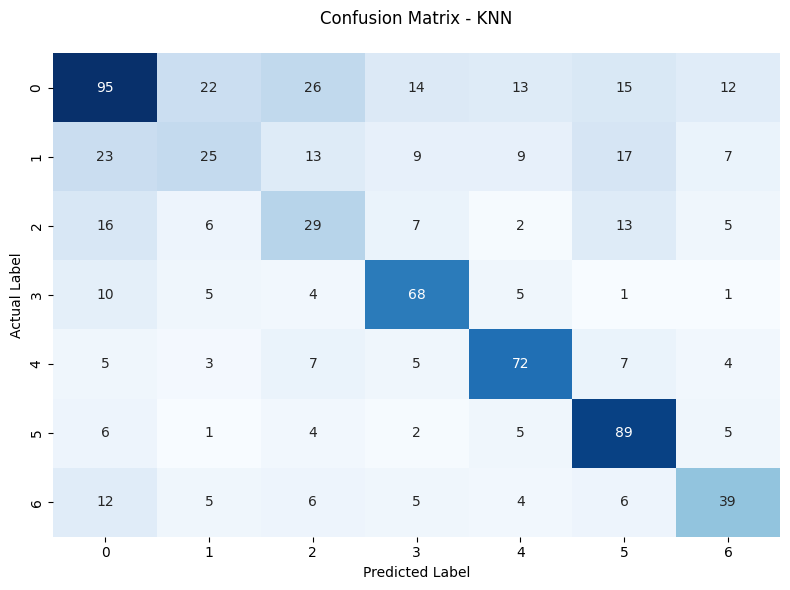

In [43]:
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=False
)

plt.title(
    f'Confusion Matrix - KNN\n',
    fontsize=12
)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()
plt.show()

In [44]:
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

f1_scores = []
acc_scores = []
pred_times = []

print("\n===== 5-FOLD CROSS VALIDATION =====")

for fold, (train_idx, val_idx) in enumerate(cv.split(X_train_final, y_train), 1):
    X_tr = X_train_final.values[train_idx]
    X_va = X_train_final.values[val_idx]
    y_tr = y_train.values[train_idx]
    y_va = y_train.values[val_idx]

    model_cv = KNeighborsClassifier(
        n_neighbors=best_k,
        weights=best_weights,
        metric=best_metric
    )
    model_cv.fit(X_tr, y_tr)

    start = time.time()
    y_pred_cv = model_cv.predict(X_va)
    pred_times.append(time.time() - start)

    acc_cv = accuracy_score(y_va, y_pred_cv)
    f1_cv = f1_score(y_va, y_pred_cv, average="macro")

    acc_scores.append(acc_cv)
    f1_scores.append(f1_cv)

    print(
        f"Fold {fold} | "
        f"Accuracy = {acc_cv*100:.2f}% | "
        f"Macro F1 = {f1_cv*100:.2f}%"
    )

print("\n===== CROSS-VALIDATION SUMMARY =====")
print(f"Accuracy Mean : {np.mean(acc_scores)*100:.2f}%")
print(f"Accuracy Std  : {np.std(acc_scores)*100:.2f}%")
print(f"Macro F1 Mean : {np.mean(f1_scores)*100:.2f}%")
print(f"Macro F1 Std  : {np.std(f1_scores)*100:.2f}%")
print(f"Avg Pred Time : {np.mean(pred_times):.4f} detik")


===== 5-FOLD CROSS VALIDATION =====
Fold 1 | Accuracy = 45.99% | Macro F1 = 44.62%
Fold 2 | Accuracy = 50.57% | Macro F1 = 49.39%
Fold 3 | Accuracy = 51.39% | Macro F1 = 49.98%
Fold 4 | Accuracy = 47.05% | Macro F1 = 45.92%
Fold 5 | Accuracy = 48.20% | Macro F1 = 46.24%

===== CROSS-VALIDATION SUMMARY =====
Accuracy Mean : 48.64%
Accuracy Std  : 2.05%
Macro F1 Mean : 47.23%
Macro F1 Std  : 2.08%
Avg Pred Time : 0.0043 detik
